# WCP: policy trackers selection

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [Adding datasets](#adding_datasets)
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
- [Datasets exploration](#datasets_exploration)
  - [Oxford Covid-19 Government Response Tracker (OxCGRT)](#oxcgrt)
- [Data exporting](#data_exporting)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
Covid-19 policy tracking datasets are considered in this notebook, with a view to their research value for the Worldwide Covid Policy project. The <a href="https://github.com/LawrenceKay/worldwide_covid_policy/blob/main/notebooks/WCP_metadata_collection_cleaning.ipynb" target="_blank">earlier notebook on the Oxford Supertracker meta-dataset</a> briefly looked at the content and coverage of the datasets collected by the supertracker, leaving nearly 70 that might be worthwhile. 
    
The quality of data will largely determine what can be learned about the comparative policy actions of governments during the pandemic. Data that has been consistently collected over meaningful periods of time, and can be used without it being necessary to make too many assumptions about, say, missing values, will support much deeper analysis and modelling than otherwise. It requires investigation and judgement to pick the right datasets, and below we'll make choices based on a mix of the credibility of the source; the relevance of the information; the consistency of collection; and perhaps how much each additional dataset adds to the information that we already have. 
    
The datasets also need to speak to the Worldwide Covid Policy project's three questions:
    
- 1) What was the policy space available to governments?
- 2) Which parts of the policy space did governments use?
- 3) Why did governments use parts of the policy space? 
      
To gauge the policy space, the datasets need to include policy variables that matched the choices available to policy-makers. This is obviously an impossible requirement in the strictest sense, so we'll be looking for data that tracked the additional decisions made during Covid. In other words, as we want to know what governments did in response to the pandemic, we need data on the actions taken that were atypical relative to their normal decision-making. From there we'll assume that the range of policies undertaken around the world defined the policy space for any government. 
    
Understanding how governments used the policy space available to them is mostly a comparative question, so we'll need consistent data across a good number of administrations at once. With data on enough countries we'll be able to see which parts of the policy space were most popular, and perhaps then identify patterns in the location decisions of policy-makers.  
    
To broach causal questions on why governments used parts of the policy space, we'll need two types of datasets: first, those that hold information that speaks to a theoretical understanding of how governments make policy. That will mean metrics of, say, the administrative capacity of national bodies, the attitudes of the population, and the local prevalence of the disease. Second, to take advantage of machine learning techniques that might show us patterns in decision-making that don't conform to prior theory, we'll need datasets rich with features that help us to search for such patterns. We'll then either need datasets that speak to our theoretical understanding, or a number of them that is enough to allow machine learning. 
    
The <a href="https://www.bsg.ox.ac.uk/research/covid-19-government-response-tracker" target="_blank">Oxford Covid-19 Government Response Tracker (OxCGRT)</a> is a benchmark for what we'll need. It followed policy and disease prevalence variables in 180 countries across the main years of the pandemic, within a <a href="https://www.bsg.ox.ac.uk/research/publications/what-would-data-framework-policy-responses-pandemic-diseases-look" target="_blank">research framework</a> that supports worldwide comparative analysis. It has enough of the right type of data - on disease and vaccination rates, say - that speak to theories about why a government might act in a given way; and lots of data because it covers so many countries across so many variables. 
    
</div>

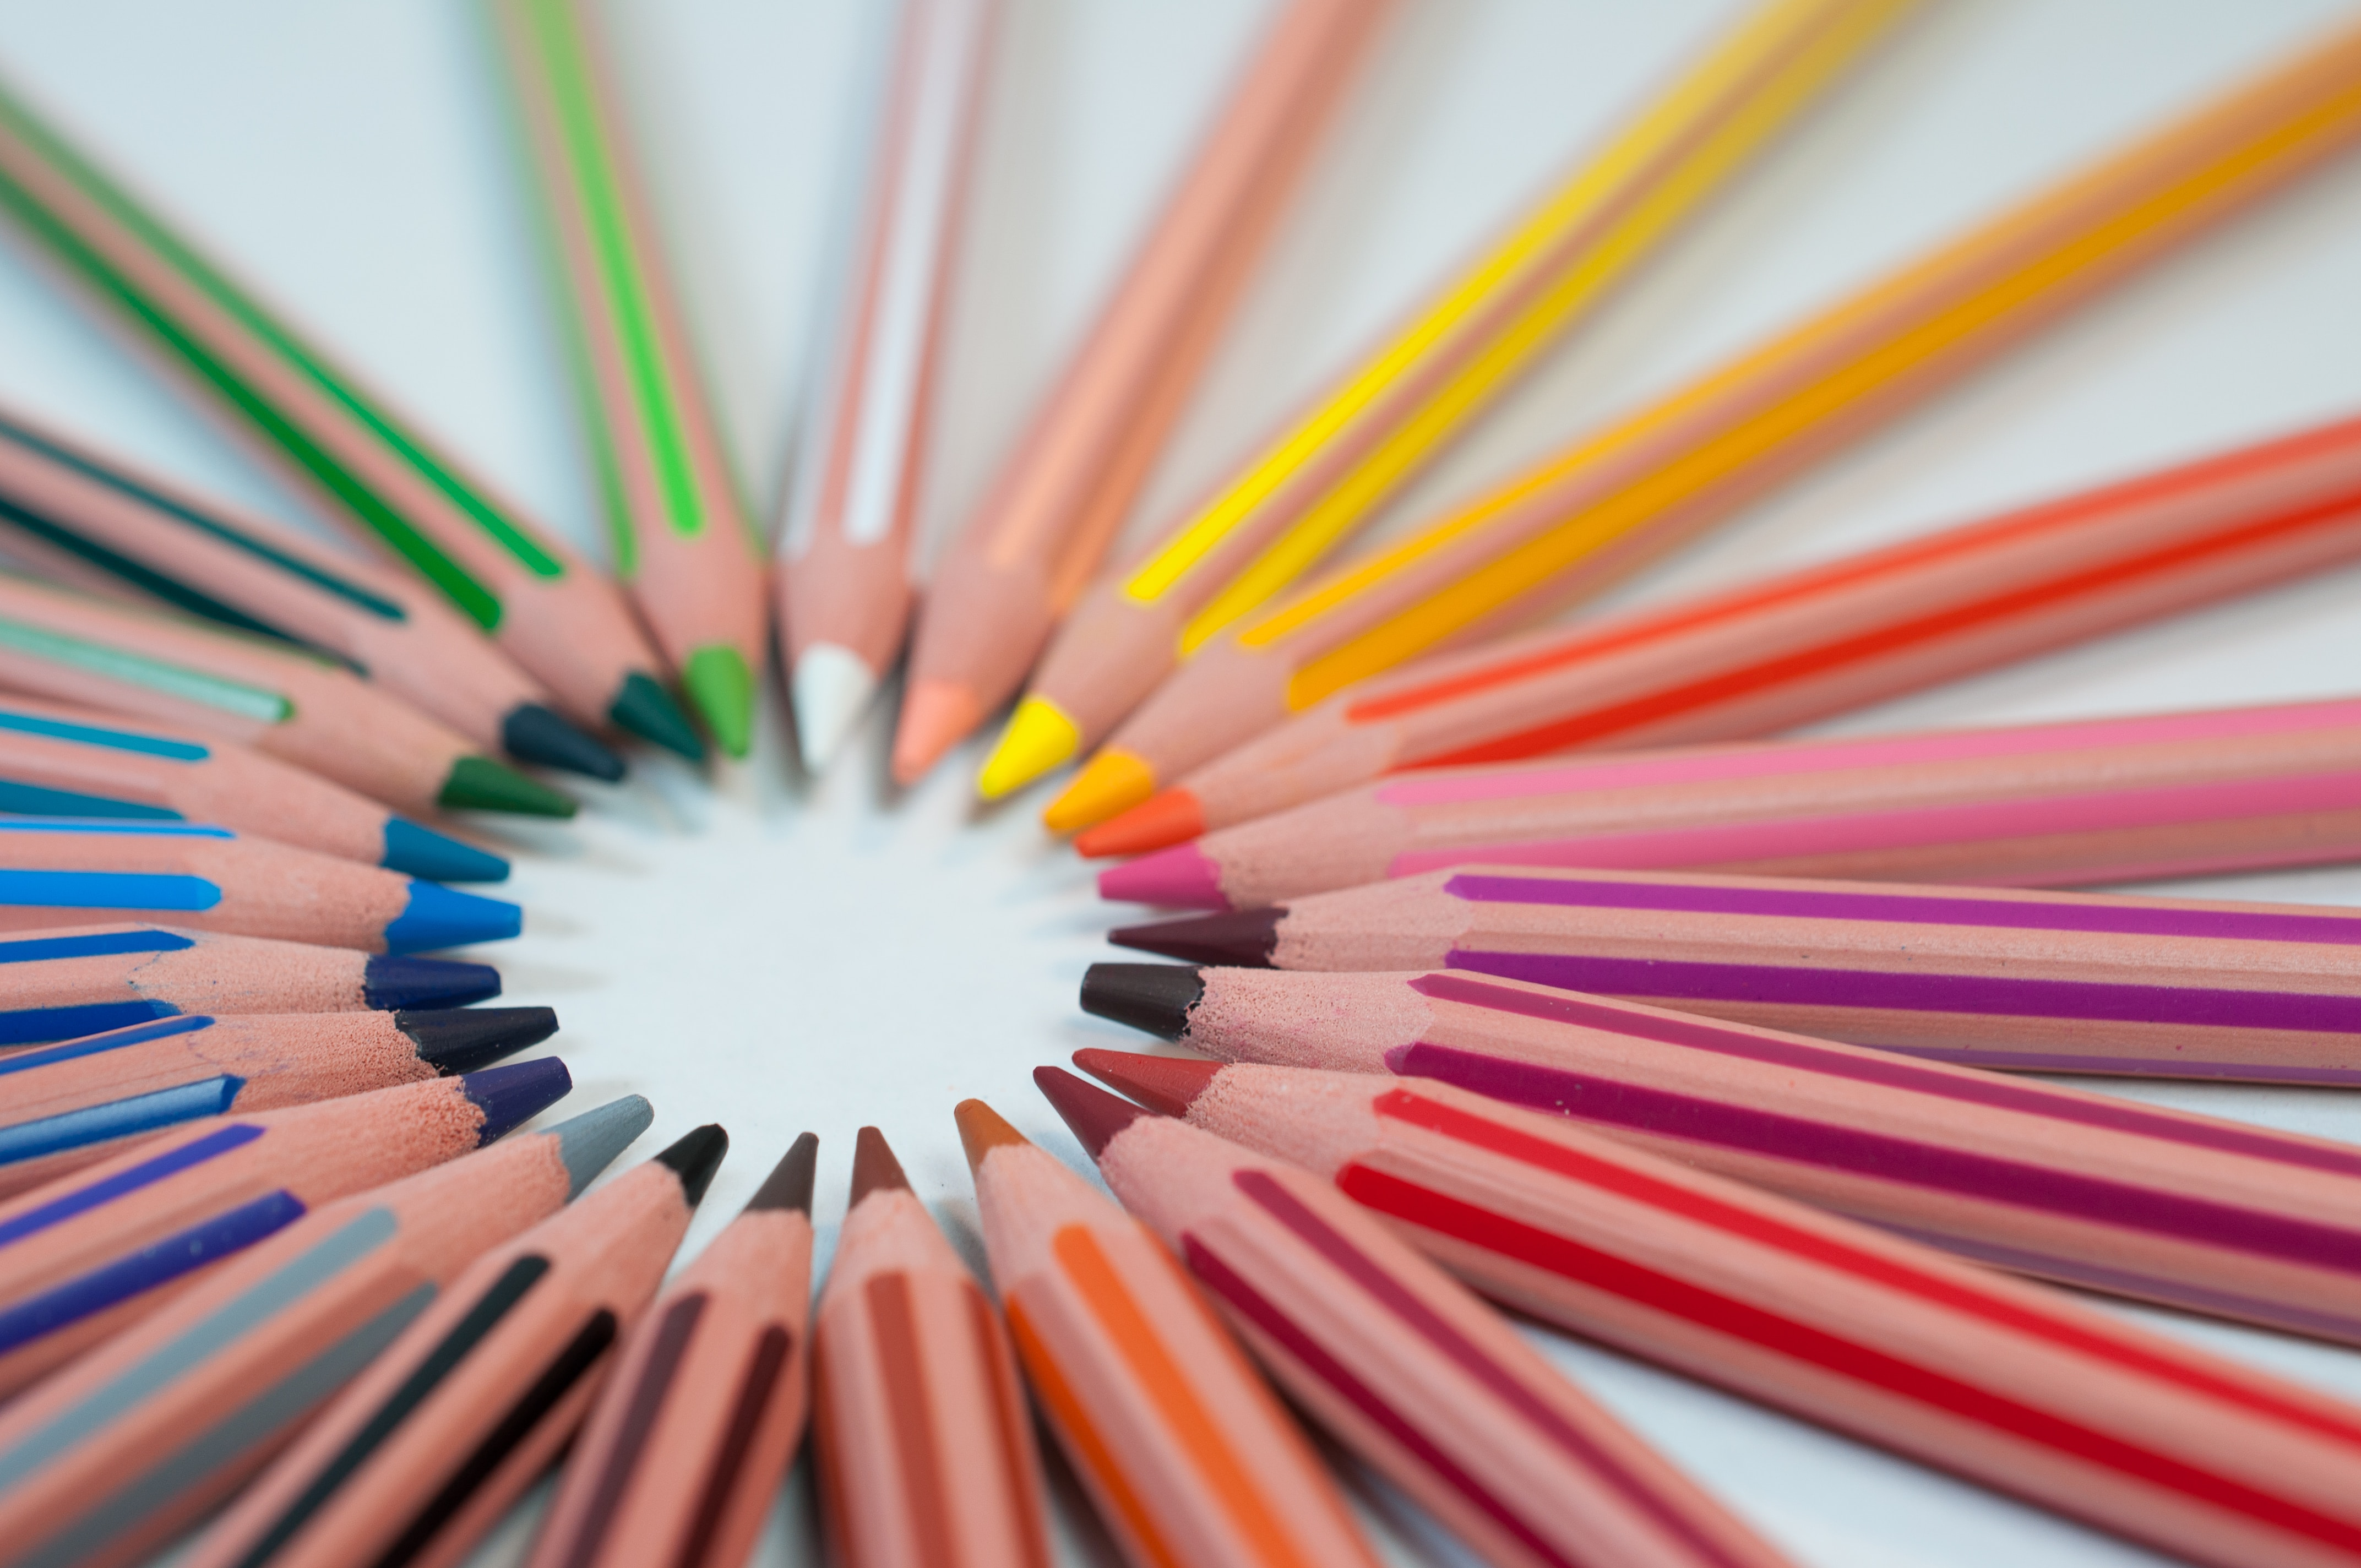

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [2]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports date and time packages for dealing with such
import datetime

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions and settings that are used in the notebook.
</div>

In [3]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [4]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

In [5]:
# Sets column widths to show all of the text
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', None)

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
[Insert]
</div>

### Adding datasets
<a id='adding_datasets'></a>

<div class="alert-info">

    
[Extra datasets are added in the steps below. Trackers that could be added include those available from the <a href="https://www.kff.org/" target="_blank">Kaiser Family Foundation</a>  in the United States, and the <a href="https://vaccinetracker.ecdc.europa.eu/public/extensions/COVID-19/vaccine-tracker.html#uptake-tab" target="_blank">European Centre for Disease Prevention and Control</a>.] https://www.covidlawlab.org/
<br>
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
A meta-dataset on Covid-19 policy trackers is used. The dataset is detailed in notebook mentioned in the introduction. 
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

In [6]:
# Imports policy trackers with the column index set to zero re the imported file
covid_policy_trackers = pd.read_csv('/Users/lawrencekay/CSS/Projects/wcp/data/oxford_supertracker_policy_trackers_only.csv', index_col=0)

## Datasets exploration
<a id='datasets_exploration'></a>

<div class="alert-info">
Let's start with the the OxCGRT data, moving through the list alphabetically thereafter. 
</div>

## Oxford Covid-19 Government Response Tracker (OxCGRT)
<a id='oxcgrt'></a>

In [19]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('Oxford COVID19 Government Response Tracker')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
51,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,"8 indicators on containment policies (such as school closures or travel restrictions), 4 economic indicators on fiscal or stimulus measures, and 6 indicators that track health system policies (such as testing).",worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; AUS; AUT; AZE; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CAF; TCD; CHL; CHN; COL; COG; CRI; CIV; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GUM; GTM; GIN; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KOR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MAC; MDG; MWI; MYS; MLI; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; SMR; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; THA; TLS; TGO; TTO; TUN; TUR; TKM; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; SRB; SSD; XKX; USA,csv; API,[Thomas Hale](https://twitter.com/thomasnhale);\n [Anna Petherick](https://twitter.com/annajessiep);\n [Toby Phillips](https://twitter.com/TobyMPhillips);\n [Oxford Blavatnik School](https://twitter.com/BlavatnikSchool),national,2020-01-01,2022-12-31,Governmental agencies; International organisations; Think tanks; Media,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics,1095


<div class="alert-info">
The OxCGRT data has 24 policy indicator groups, plus four 'epidemiological statistics' on confirmed cases; confirmed deaths; the percentage of a population that has been vaccinated; and whether the majority of a population has been vaccinated. The groups are as follows:  
<br>
    
    
- School closing
- Workplace closing
- Cancel public events
- Restrictions on gathering size
- Close public transport
- Stay at home requirements
- Restrictions on internal movement
- Restrictions on international travel
- Income support
- Debt/contract relief for households
- Fiscal measures
- Giving international support
- Public information campaign	
- Testing policy
- Contact tracing
- Emergency investment in healthcare
- Investment in Covid-19 vaccines
- Facial coverings
- Vaccination Policy
- Protection of elderly people
</div>

## #Masks4All
<a id='#masks4all'></a>

In [9]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('#Masks4All')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
0,#Masks4All,https://masks4all.co/what-countries-require-masks-in-public/,Non-Pharmaceutical Interventions,collects what countries require masks in public or recommend masks.,worldwide,html; csv,[#Masks4All](https://masks4all.co/),national,2020-03-16,2020-12-21,Media,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,NGOs,280


<div class="alert-info">
Tracked mask-wearing policies across the world up to December 2020, with some differentiation by requirements as they applied to a range of public areas. 
<br>
    
The OxCGRT data includes the same policy toggle, but over a longer period of time and with more consistent place-based differentiation. 
</div>

## A global database on central banks' monetary responses to Covid-19
<a id='global_database_on_central_banks'></a>

In [10]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('A global database on central banks')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
1,A global database on central banks' monetary responses to Covid-19,https://www.bis.org/publ/work934.htm,Macroeconomic and Financial Policy,"Provides details of central banks' monetary policy responses to Covid-19, including interest rate measures, reserve policies, lending operations, asset purchase programmes and foreign exchange operations",EU; DZA; ARG; AUS; BRA; CAN; CHL; CHN; COL; CZE; DNK; HKG; HUN; IND; IDN; ISR; JPN; KOR; KWT; MYS; MEX; MAR; NZL; NOR; PER; PHL; POL; ROU; SAU; SGP; ZAF; SWE; CHE; THA; TUR; ARE; GBR; USA; VNM,xlsx,[Carlos Cantú](https://www.bis.org/author/carlos_cant%c3%ba.htm); [Paolo Cavallino](https://www.bis.org/author/paolo_cavallino.htm); [Fiorella De Fiore](https://www.bis.org/author/fiorella_de_fiore.htm); [James Yetman](https://www.bis.org/author/james_yetman.htm),national,2020-02-03,2021-02-16,Governmental agencies,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations,379


<div class="alert-info">
Holds data on a range of monetary policies - interest rate measures, reserve policies, lending operations, asset purchase programmes and foreign exchange operations - for 39 countries from 2020-02-03 to 2021-02-16 that exceeds the depth of information available through the OxCGRT 'fiscal measures' category. 

</div>

## CGD - COVID education policy tracking
<a id='covid_education_policy_tracking'></a>

In [11]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('COVID education policy tracking')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
2,CGD - COVID education policy tracking,https://docs.google.com/spreadsheets/d/1ndHgP53atJ5J-EtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit#gid=0,Education Policy,school closures,worldwide; IND; BRA; NGA; USA; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; MNP; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TWN; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TCA; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; IMN; MNE; SRB; SXM; SSD; XKX,csv; xlsx; pdf; html,[Center for Global Development](https://twitter.com/CGDev);\n [Lee Crawfurd](https://twitter.com/leecrawfurd),national; sub-national,2020-02-12,2020-09-22,Governmental agencies; International organisations; Media,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Think tanks,223


<div class="alert-info">
Has data on school closures across the world that is not included in the OxCGRT - such as planned re-opening dates - but the OxCGRT essentially incorporates everything else and carries on for a longer period of time. 

</div>

## CGD - CIHI COVID-19 Intervention Scan
<a id='cihi_cobid-19_intervention_scan'></a>

In [12]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('Intervention Scan')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
3,CIHI COVID-19 Intervention Scan,https://www.cihi.ca/en/covid-19-intervention-scan,Health and Care Policy; Non-Pharmaceutical Interventions,"It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies.",Canada,xlsx,[Canadian Institute for Health Information (CIHI)](https://twitter.com/CIHI_ICIS),national; sub-national,2020-05-05,2022-01-31,Governmental agencies,English,North America,Governmental agencies,636


<div class="alert-info">
Includes variables on Canada that exceed the depth of the OxCGRT data in several domains. For example, the timing of regulatory approval for vaccines; the release location and type of public information campaigns; and policy actions down to the municipal level are included. The focus on Canada is limiting, nonetheless.     

</div>

## COVID Analysis and Mapping of Policies (AMP) site
<a id='covid_analysis_and_mapping_of_policies'></a>

In [13]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('COVID Analysis and Mapping of Policies')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
4,COVID Analysis and Mapping of Policies (AMP) site,https://covidamp.org/,Non-Pharmaceutical Interventions,non-pharmaceutical interventions. Available on a sub-national level for the USA.,ARG; AUS; BOL; BWA; BRA; CAN; TCD; COL; COG; DNK; DJI; ECU; EGY; SLV; EST; ETH; FRA; DEU; GHA; HND; IND; IRQ; IRL; ISR; ITA; JPN; JOR; LBY; MLI; MHL; MEX; MNG; MAR; NZL; NER; NGA; OMN; PAN; PER; PHL; RUS; RUS; SAU; SEN; SOM; ZAF; ESP; SWE; CHE; THA; UGA; GBR; USA; UMI; URY; YEM,html; xlsx,"[Georgetown Global Health Science & Security](https://twitter.com/georgetown_ghss);\n[Talus Analytics, LLC](https://twitter.com/talusanalytics/);\n[NTI](https://twitter.com/NTI_WMD)",national; sub-national,2020-01-01,2023-03-10,Governmental agencies,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,Academics,1164


<div class="alert-info">
Has worldwide data on policies similar to those tracked by the OxCGRT, but including novel types and at times more detail. Includes, for example, tracking of military mobilization, which may deepen comparative analysis of countries. The data runs for a comparably long time, 2020-01-01 to 2023-03-10. 

</div>

## COVID Border Accountability Project (COBAP)
<a id='covid_border_accountability_project'></a>

In [14]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('COVID Border Accountability Project')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
5,COVID Border Accountability Project (COBAP),https://www.nature.com/articles/s41597-021-01031-5,Non-Pharmaceutical Interventions,documents travel and immigration policies in response to the pandemic on a daily basis.,worldwide,html; csv,[Mary Shiraef](https://politicalscience.nd.edu/people/students/mary-a-shiraef/); Mark Weiss; Ian Wang; Camilla Kline; Nikolas Lazar; Michael Shiraef; Ellen Shiraef; Noah Taylor; Bryn Walker; Rachel Musetti; Hannah Risman; Cayleigh Jackson; Cora Hirst; Aadya Bhaskaran; Elizabeth Beling; Aman Bedi; Layth Mattar; Suzanne Martin; Kriti Desai; Yeshwini Selvaraj; Thuy Nguyen; Amalia Gradie; Sarah Naseer,national,2020-01-01,2020-12-31,Governmental agencies,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics,365


<div class="alert-info">
A paper from the project, <a href="https://www.nature.com/articles/s41597-021-01031-5" target="_blank">COVID Border Accountability Project, a hand-coded global database of border closures introduced during 2020</a>, states the following re OxCGRT:
    
'...we recommend users to incorporate our dataset into the OxCGRT10 category “international travel controls” (restricting on 4 for what we call “complete closures” and/or on 3 for our “partial closures”). The difference to note here is that the category from OxCGRT does not distinguish between outgoing and incoming international movement or between screening measures and quarantines versus closures. COBAP’s database records restrictions strictly on incoming travel.'

</div>

## COVID-19 EU PolicyWatch
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Economic Stimulus Index
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Financial Response Tracker (CFRT)
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Global Education Recovery Tracker
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Global Travel Restrictions and Airline Information
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Nonpharmaceutical Interventions Effectiveness
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Protective Policy Index (PPI)
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Reported Patient Impact and Hospital Capacity by Facility
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Resource Tracker: A Guide to State and Local Responses
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Restrictions Timeseries
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 School Data Hub
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Trade Policy Database: Food and Medical Products
<a id='covid_border_accountability_project'></a>

<div class="alert-info">
To be completed. 

</div>

## COVID-19 Trade Policy Database: Food and Medical Products
<a id='covid_19_trade_policy_database'></a>

In [15]:
# Gets entry information
covid_policy_trackers.loc[covid_policy_trackers['Title'].str.contains('COVID-19 Trade Policy Database')]

,Title,Link,Policy Area,Notes,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider,Length (days)
17,COVID-19 Trade Policy Database: Food and Medical Products,https://globalgovernanceprogramme.eui.eu/covid-19-trade-policy-database-food-and-medical-products/,Trade Policy and FDI,Collects information on trade policy changes affecting medical and food products during the COVID-19 pandemic.,worldwide,xlsx,[EUI Robert Schuman Centre](https://twitter.com/eui_schuman); [Global Trade Alert](https://twitter.com/gtalert); [World Bank](https://twitter.com/worldbank),national,2020-05-21,2023-12-31,Governmental agencies; International organisations; Academics; Media,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics,1319


<div class="alert-info">
Carries data on a policy area that is not covered by OxCGRT: trade. For a number of areas of trade policy, such as export controls on food or medicinal goods, the database tracks the policy actions of a great many of the world's countries. The data was last updated in February 2023 and may still be attended to.  

</div>

## Further datasets to be considered

COVID-19 US County Policies

COVID-19 US state policy database (CUSP)

COVID-19 and World Trade

COVID-19 sex-disaggregated data tracker

Cato COVID-19 Permanent Private School Closures

Complexity Science Hub COVID-19 Covid-19 Control Strategies List (CCCSL)

Corona Daten Plattform

CoronaNet research project

Coronavirus Response Tech Tracker

Coronavirus containment measures

Covid Stimulus Watch

Covid-19 Food Policy Tracker

ECDC-JRC Response Measures Database

Energy Policy Tracker

Exceptius: Exceptional powers in times of SARS-COV-2

Fiscal Monitor Database of Country Fiscal Measures in Response to the COVID-19 Pandemic

Food and Agriculture Policy Decision Analysis

Google Covid-19 Community Mobility Reports

Governments' responses to COVID-19 dataset

Grattan: coronavirus announcements tracker

How are children going back to school in America's 225 largest public school districts?

IGC COVID-19 tracker

ILO Social Protection Monitor

ILO collection of country policy responses

IMF Fiscal Monitor

International travel restrictions in response to the COVID-19 outbreak dataset

Mobility and border control in response to the COVID-19 outbreak dataset

OECD Covid Action Map

OECD Green Recovery Database

OECD employment and social policies dataset

OECD tax policy dataset

Open Government Approaches to Tackling COVID-19

Our World in Data COVID-19 dataset

Paid sick leave policy responses to the COVID-19 crisis

School COVID Survey

Social Protection and Jobs Responses to COVID-19 : A Real-Time Review of Country Measures: Global Database on Social Protection and Jobs Responses to COVID-19

Social protection responses to COVID-19 in the Global South – database and dashboard

Stanford School Enrollment Project 2020-2021

State COVID-19 Data and Policy Actions

Subnational COVID-19 vaccination data

The Health Foundation COVID-19 policy tracker

The Johns Hopkins Disability Health Research Center COVID-19 Vaccine Dashboard

UCLA Law Covid-19 Behind Bars Data Project

UNESCO COVID-19 Educational Disruption and Response

UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak

WHO PHSM: Public health and social measures

World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)

World Bank Education Team COVID tracking database and map of school closures

## Data exporting
<a id='data_exporting'></a>

<div class="alert-info">
No datasets exported. 
   
</div>

## Conclusion
<a id='conclusion'></a>

<div class="alert-info">
The OxCGRT data is being used in a further notebook. Other datasets will be used as required. 
   
</div>